In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import f1_score

In [3]:
def apply_mask(inputs, mask_list, columns):
    for column in columns: 
        for mask in mask_list: 
            inputs[column] = np.where(inputs[column].between(mask[0], mask[1]), mask[2], inputs[column])
    return inputs

def make_data(dataset, features, wc_mask, rel_mask, normalize):
    datasets = []
    for file in dataset:
        datasets.append(pd.read_csv("../" + file))
    dataset = pd.concat(datasets, axis=0, ignore_index=True)
    
    if normalize: 
            l = min(len(dataset.loc[dataset["affect"] == 0]), len(dataset.loc[dataset["affect"] == 1]), len(dataset.loc[dataset["affect"] == 2]), len(dataset.loc[dataset["affect"] == 3]))
            dataset = pd.concat([dataset.loc[dataset["affect"] == 0][:l], dataset.loc[dataset["affect"] == 1][:l], dataset.loc[dataset["affect"] == 2][:l], dataset.loc[dataset["affect"] == 3][:l]], axis=0, ignore_index=True)
            
    targets = dataset["affect"]
    inputs = dataset.drop(["text", "affect"], axis="columns")
    tmp = dataset.drop(["text", "affect", "word_count"], axis="columns")
    
    inputs = apply_mask(inputs, wc_mask, tmp.columns)
    inputs = apply_mask(inputs, wc_mask, ["word_count"])
    inputs = inputs.astype(int)
    train_x, test_x, train_y, test_y = train_test_split(inputs, targets, test_size=0.2)
    return train_x, test_x, train_y, test_y    

In [4]:
emotion_dataset = ["emotion_classification_1_clean.csv", "emotion_classification_2_clean.csv", "emotion_classification_3_clean.csv", "emotion_classification_4_clean.csv", "emotion_classification_5_clean.csv", "emotion_classification_6_clean.csv", "emotion_classification_7_clean.csv", "emotion_classification_8_clean.csv"]
tweet_dataset = ["crowdflower_clean.csv", "emoint_clean.csv", "tec_clean.csv"]
full_features = ["word_count", "upper_word_count", "ent_word_count", "h_count", "s_count", "a_count", "f_count", "cons_punct_count"]
nolex_features = ["word_count", "upper_word_count", "ent_word_count", "cons_punct_count"]
lex_features = ["h_count", "s_count", "a_count", "f_count"]
wc_mask = [[0,4,0],[5,9,1],[10,14,2],[15,24,3],[25,34,4],[35,49,5],[50,99,6]]
rel_mask = [[0,0.14,0],[0.15,0.29,1],[0.3,0.44,2],[0.45,0.59,3],[0.6,0.74,4],[0.75,0.89,5],[0.9,1,6]]

train_x, test_x, train_y, test_y = make_data(tweet_dataset, lex_features, wc_mask, rel_mask, True)

0.2968683876428269
weighted f1_score:  0.2024971452356847
[[-0.07905031  0.          0.          0.          0.          0.
   0.          0.23175235]
 [-0.18299678  0.          0.          0.          0.          0.
   0.          0.14442918]
 [ 0.12161598  0.          0.          0.          0.          0.
   0.         -0.06504906]
 [ 0.14043111  0.          0.          0.          0.          0.
   0.         -0.31113247]]


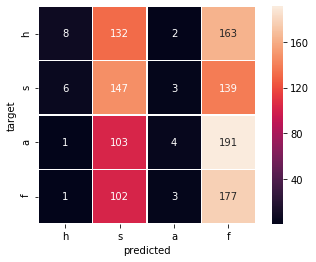

1182 1182
[[0.23918942 0.22728269 0.26339442 0.27013347]
 [0.2868858  0.37236047 0.17303298 0.16772075]
 [0.23918942 0.22728269 0.26339442 0.27013347]
 ...
 [0.23918942 0.22728269 0.26339442 0.27013347]
 [0.23918942 0.22728269 0.26339442 0.27013347]
 [0.23918942 0.22728269 0.26339442 0.27013347]]


In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LogisticRegression(multi_class="multinomial", solver="newton-cg")
model.fit(train_x, train_y)
# https://www.youtube.com/watch?v=J5bXOOmkopc
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
pred_y = model.predict(test_x)
print(model.score(train_x, train_y))
print("weighted f1_score: ", f1_score(test_y, pred_y, average="weighted"))
print(model.coef_)
cm = confusion_matrix(test_y, pred_y)
sn.heatmap(cm, fmt="d", linewidth=0.5, annot=True, square=True, xticklabels=["h", "s", "a", "f"], yticklabels=["h", "s", "a", "f"])
plt.xlabel("predicted")
plt.ylabel("target")
plt.show()
# wenn man das nachher in das netz integriert, dann nimm pred_prob statt predict!!
pred_prob = model.predict_proba(test_x)
print(len(test_x), len(pred_prob))
print(pred_prob)

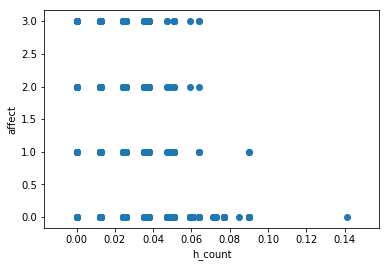

In [28]:
#plt.scatter(dataset["word_count"].tolist(), dataset["affect"].tolist())


plt.clf()
plt.ylabel('affect')
plt.xlabel("h_count")
a = plt.scatter(dataset["h_count"].tolist(), dataset["affect"].tolist())